In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

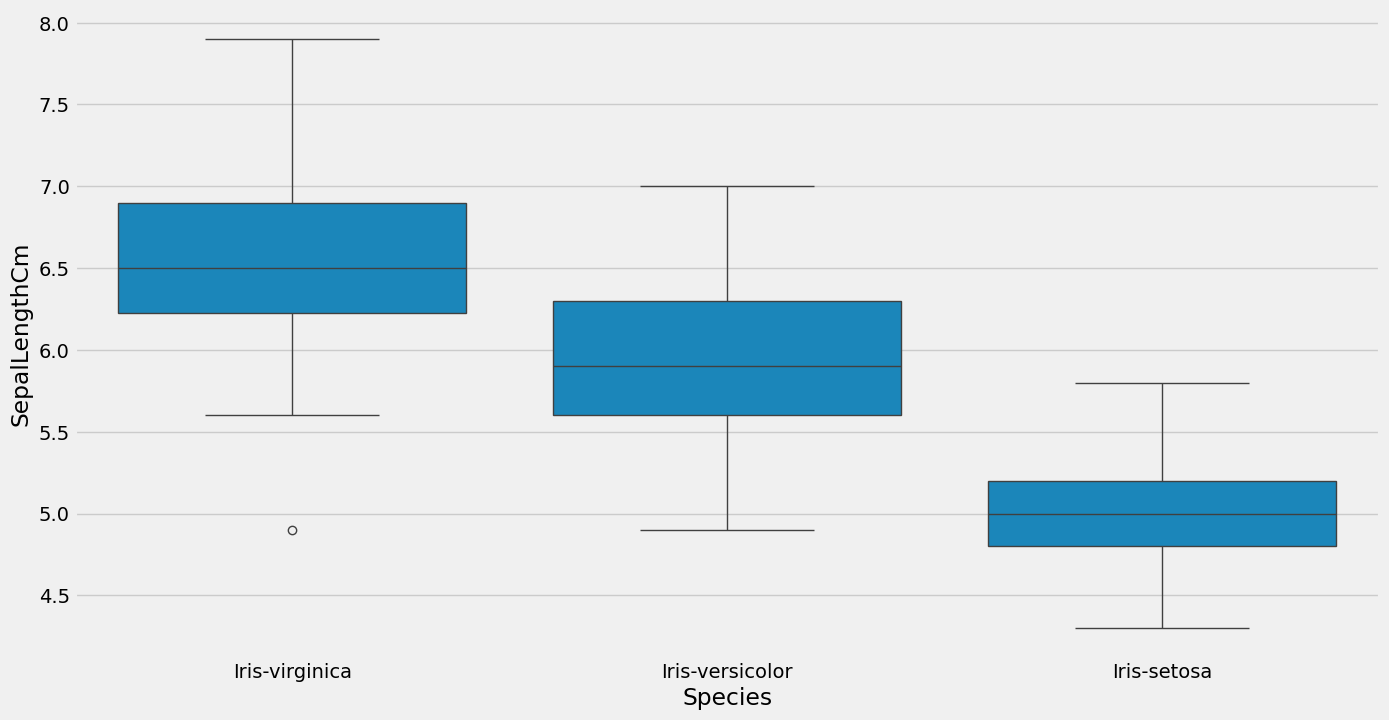

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

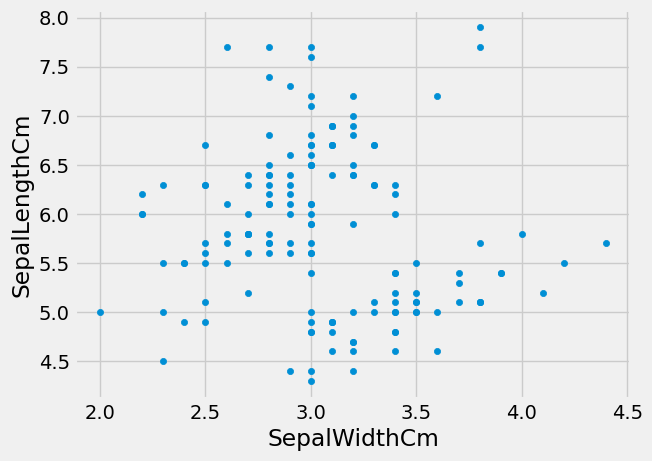

In [12]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

In [13]:
X=df.drop('Species',axis=1)
y=df['Species']

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [15]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
y = to_categorical(df.Species)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [17]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3583 - loss: 1.2893 - val_accuracy: 0.3333 - val_loss: 1.1365
Epoch 2/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.0806 - val_accuracy: 0.3333 - val_loss: 0.9711
Epoch 3/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3222 - loss: 0.9587 - val_accuracy: 0.3556 - val_loss: 0.8875
Epoch 4/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5352 - loss: 0.8728 - val_accuracy: 0.6667 - val_loss: 0.8442
Epoch 5/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7063 - loss: 0.8213 - val_accuracy: 0.6667 - val_loss: 0.8061
Epoch 6/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6698 - loss: 0.8022 - val_accuracy: 0.6667 - val_loss: 0.7710
Epoch 7/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6792 - loss: 0.7659 - val_accuracy: 0.6667 - val_loss: 0.7406
Epoch 8/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6542 - loss: 0.7466 - val_accuracy: 0.6667 - val_loss: 0.7120

In [20]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9199 - loss: 0.3795


[0.38498756289482117, 0.9111111164093018]

In [21]:
pred = model.predict(X_test[:10])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.01167406 0.4515287  0.53679717]
 [0.8815334  0.10629307 0.01217353]
 [0.06762356 0.55776775 0.37460855]
 [0.03595318 0.5477943  0.41625255]
 [0.93568593 0.05841187 0.00590217]
 [0.00182257 0.29294053 0.70523685]
 [0.01167344 0.4347383  0.5535883 ]
 [0.01536492 0.48493576 0.49969918]
 [0.00247354 0.31785822 0.67966825]
 [0.00228529 0.2742369  0.7234779 ]]


In [22]:
history.history['accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.32380953431129456,
 0.561904788017273,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6761904954910278,
 0.6761904954910278,
 0.6857143044471741,
 0.6857143044471741,
 0.6666666865348816,
 0.6761904954910278,
 0.6952381134033203,
 0.723809540271759,
 0.8285714387893677,
 0.8761904835700989,
 0.8952381014823914,
 0.8761904835700989,
 0.7904762029647827,
 0.7142857313156128,
 0.7714285850524902,
 0.8190476298332214,
 0.8666666746139526,
 0.8952381014823914,
 0.9047619104385376,
 0.9142857193946838,
 0.9142857193946838,
 0.9238095283508301,
 0.9238095283508301,
 0.8857142925262451,
 0.8190476298332214,
 0.8666666746139526,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.9523809552192688,
 0.9142857193946838,
 0.9238095283508301,
 0.9714285731315613,
 0.9714285731315613,
 0.9333333373069763]

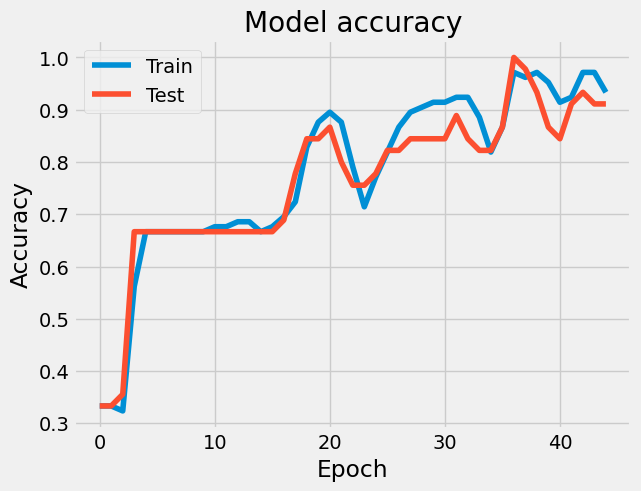

In [23]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()